In [ ]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)

In [2]:
 !pip install chart_studio

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 

import seaborn as sns
import cv2

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
from io import BytesIO 
import seaborn as sns; sns.set()
import tensorflow
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D
from sklearn.metrics import cohen_kappa_score , matthews_corrcoef , classification_report , roc_auc_score , accuracy_score
from sklearn.ensemble import RandomForestClassifier

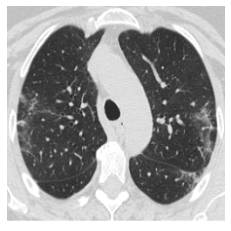

<class 'numpy.ndarray'>
(224, 224, 3)


In [4]:
img = plt.imread("/content/drive/My Drive/dataset_pr/COVID/Covid (1).png")
img = cv2.resize(img,(224,224))
plt.imshow(img)
plt.axis("off")
plt.show()
print(type(img))
print(img.shape)

In [5]:
x_ = list()
y = list()
IMG_SIZE = 224
c = 0
nc = 0
for i in os.listdir("/content/drive/My Drive/dataset_pr/COVID"):
    try:
        path = "/content/drive/My Drive/dataset_pr/COVID/"+i
        #print('1')
        img = cv2.imread(path)
        img_ = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        img_arr = np.asarray(img_)
        x_.append(img_arr)
        label = 0
        c = c+1
    except:
        None
for i in os.listdir("/content/drive/My Drive/dataset_pr/NON-COVID"):
    try:
        path = "/content/drive/My Drive/dataset_pr/NON-COVID/"+i
        img = cv2.imread(path)
        img_ = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        img_arr = np.asarray(img_)
        x_.append(img_arr)
        label = 1
        nc = nc+1
    except:
        None

In [6]:
x1=[]
from keras.preprocessing import image
for item in x_:
      if len(item.shape) > 2 and item.shape[2] == 4:
            item = cv2.cvtColor(item, cv2.COLOR_BGRA2BGR)
      x1.append(item)
Y = []
for i in range(1252):
    Y.append(1)

for i in range(1229):
    Y.append(0)
X = np.asarray(x1)
y = np.asarray(Y)
print(X.shape)

(2481, 224, 224, 3)


In [7]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X , y , test_size=0.10 , random_state=42)
X_train, x_val, y_train, y_val = train_test_split(X_train , y_train, test_size=0.10 , random_state=42)

In [8]:
def print_performance_metrics(y_test, max_y_pred_test):
    print('Test Accuracy:', np.round(metrics.accuracy_score(y_test, max_y_pred_test),4))
    print('Precision:', np.round(metrics.precision_score(y_test, max_y_pred_test,average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(y_test, max_y_pred_test , average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(y_test, max_y_pred_test, average='weighted'),4))
    print('Cohen Kappa Score:',cohen_kappa_score(y_test, max_y_pred_test, labels=None, weights=None))
    print('Matthews Corrcoef:',matthews_corrcoef(y_test, max_y_pred_test))
    print('ROC AUC:',roc_auc_score(y_test,max_y_pred_test))
    print('\t\tClassification Report:\n', classification_report(y_test,max_y_pred_test))

In [9]:
def print_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y_pred, y)
    cm_df = pd.DataFrame(cm , index = ['Covid','Non-Covid'],columns = ['Covid','Non-Covid'])
    plt.figure(figsize=(6,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### **Feature Extraction Using VGG-19**

In [10]:
from keras.applications.vgg19 import VGG19
base_model = VGG19(include_top=False, weights='imagenet', input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='tanh')(x)
predictions = Dense(8, activation='tanh')(x)
model_feat = Model(inputs=base_model.input,outputs=predictions)

80142336/80134624 [==============================] - 1s 0us/step


**KNN Classifier**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski' , p=2)
model.fit(feat_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Training Accuracy : 0.7749
Validation Accuracy : 0.6875


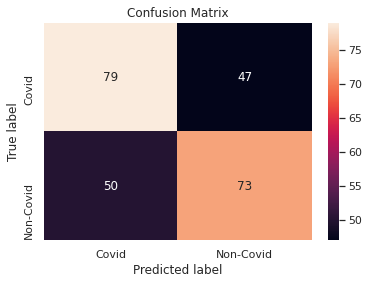

Test Accuracy: 0.6104
Precision: 0.6108
Recall: 0.6104
F1 Score: 0.6106
Cohen Kappa Score: 0.22054409913834838
Matthews Corrcoef: 0.2206082107842548
ROC AUC: 0.6103682170542636
		Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62       129
           1       0.59      0.61      0.60       120

    accuracy                           0.61       249
   macro avg       0.61      0.61      0.61       249
weighted avg       0.61      0.61      0.61       249



In [12]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**ANN Classifier**

In [13]:
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = Sequential()
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['accuracy'])
model.fit(feat_train , y_train)

63/63 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5986


Training Accuracy : 0.614
Validation Accuracy : 0.6205


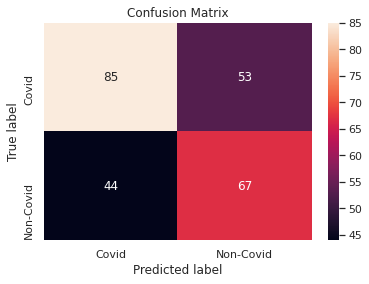

Test Accuracy: 0.6104
Precision: 0.61
Recall: 0.6104
F1 Score: 0.6094
Cohen Kappa Score: 0.21781793451860487
Matthews Corrcoef: 0.21839382592910492
ROC AUC: 0.608624031007752
		Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64       129
           1       0.60      0.56      0.58       120

    accuracy                           0.61       249
   macro avg       0.61      0.61      0.61       249
weighted avg       0.61      0.61      0.61       249



In [14]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Decision Tree Classifier**

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training Accuracy : 1.0
Validation Accuracy : 0.6518


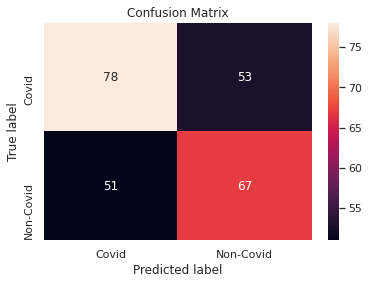

Test Accuracy: 0.5823
Precision: 0.5821
Recall: 0.5823
F1 Score: 0.5822
Cohen Kappa Score: 0.16307930967616835
Matthews Corrcoef: 0.16310043557396708
ROC AUC: 0.5814922480620155
		Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60       129
           1       0.57      0.56      0.56       120

    accuracy                           0.58       249
   macro avg       0.58      0.58      0.58       249
weighted avg       0.58      0.58      0.58       249



In [16]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**SVM Classifier**

In [17]:
from sklearn.svm import SVC
model = SVC( kernel = 'sigmoid',random_state = 0)

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training Accuracy : 0.5164
Validation Accuracy : 0.5804


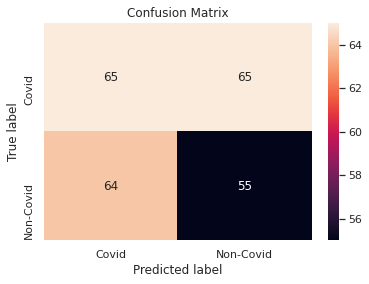

Test Accuracy: 0.4819
Precision: 0.4818
Recall: 0.4819
F1 Score: 0.4818
Cohen Kappa Score: -0.03780168653678406
Matthews Corrcoef: -0.03780290988920641
ROC AUC: 0.48110465116279066
		Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50       129
           1       0.46      0.46      0.46       120

    accuracy                           0.48       249
   macro avg       0.48      0.48      0.48       249
weighted avg       0.48      0.48      0.48       249



In [18]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Random Forest Classifier**

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training Accuracy : 1.0
Validation Accuracy : 0.7411


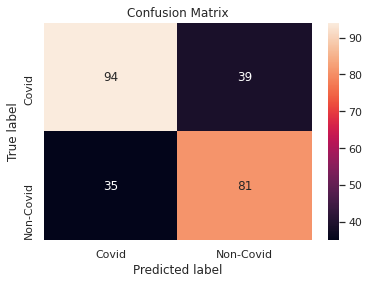

Test Accuracy: 0.7028
Precision: 0.7027
Recall: 0.7028
F1 Score: 0.7026
Cohen Kappa Score: 0.4041521148622429
Matthews Corrcoef: 0.40436190267575184
ROC AUC: 0.7018410852713177
		Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       129
           1       0.70      0.68      0.69       120

    accuracy                           0.70       249
   macro avg       0.70      0.70      0.70       249
weighted avg       0.70      0.70      0.70       249



In [20]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**XG-Boost Classifier**

In [21]:
from xgboost import XGBClassifier
model = XGBClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy : 0.7913
Validation Accuracy : 0.7321


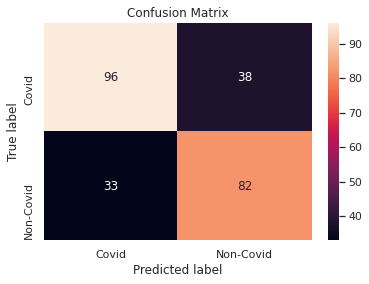

Test Accuracy: 0.7149
Precision: 0.7148
Recall: 0.7149
F1 Score: 0.7145
Cohen Kappa Score: 0.4281416787967006
Matthews Corrcoef: 0.42848928407612447
ROC AUC: 0.7137596899224807
		Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       129
           1       0.71      0.68      0.70       120

    accuracy                           0.71       249
   macro avg       0.71      0.71      0.71       249
weighted avg       0.71      0.71      0.71       249



In [22]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**AdaBoost Classifier**

In [23]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Training Accuracy : 0.7131
Validation Accuracy : 0.7054


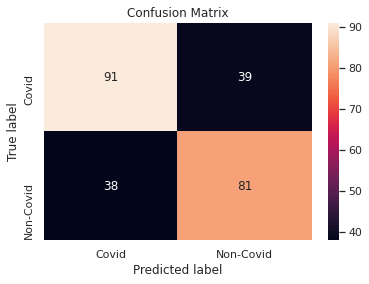

Test Accuracy: 0.6908
Precision: 0.6907
Recall: 0.6908
F1 Score: 0.6907
Cohen Kappa Score: 0.38053697780362505
Matthews Corrcoef: 0.38054929288467787
ROC AUC: 0.6902131782945736
		Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70       129
           1       0.68      0.68      0.68       120

    accuracy                           0.69       249
   macro avg       0.69      0.69      0.69       249
weighted avg       0.69      0.69      0.69       249



In [24]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)
print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **Feature Extraction using VGG16**

In [25]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='tanh')(x)
predictions = Dense(8, activation='tanh')(x)
model_feat = Model(inputs=base_model.input,outputs=predictions)

58892288/58889256 [==============================] - 0s 0us/step


**KNN Classifier**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski' , p=2)
model.fit(feat_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Training Accuracy : 0.7869
Validation Accuracy : 0.5982


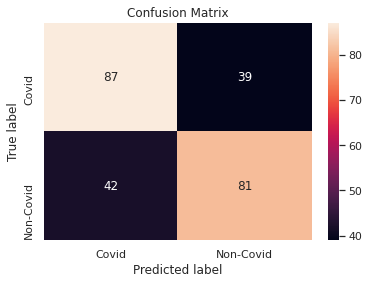

Test Accuracy: 0.6747
Precision: 0.6751
Recall: 0.6747
F1 Score: 0.6748
Cohen Kappa Score: 0.3491141446413012
Matthews Corrcoef: 0.34921563129412764
ROC AUC: 0.6747093023255815
		Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68       129
           1       0.66      0.68      0.67       120

    accuracy                           0.67       249
   macro avg       0.67      0.67      0.67       249
weighted avg       0.68      0.67      0.67       249



In [27]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**ANN Classifier**

In [28]:
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = Sequential()
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['accuracy'])
model.fit(feat_train , y_train)

63/63 [==============================] - 0s 2ms/step - loss: 0.7684 - accuracy: 0.5075


Training Accuracy : 0.508
Validation Accuracy : 0.5


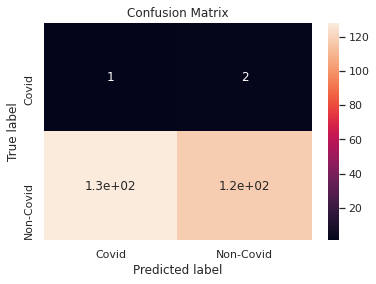

Test Accuracy: 0.4779
Precision: 0.4039
Recall: 0.4779
F1 Score: 0.3186
Cohen Kappa Score: -0.0085997382688352
Matthews Corrcoef: -0.04082868827303825
ROC AUC: 0.4955426356589147
		Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.01      0.02       129
           1       0.48      0.98      0.64       120

    accuracy                           0.48       249
   macro avg       0.41      0.50      0.33       249
weighted avg       0.40      0.48      0.32       249



In [29]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Decision Tree Classifier**

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training Accuracy : 1.0
Validation Accuracy : 0.6696


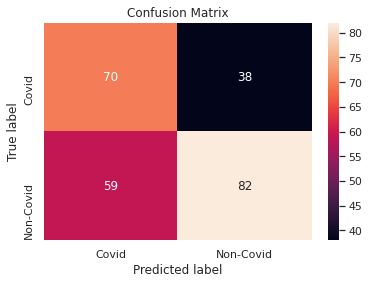

Test Accuracy: 0.6104
Precision: 0.6161
Recall: 0.6104
F1 Score: 0.6089
Cohen Kappa Score: 0.2245979004141384
Matthews Corrcoef: 0.22783104014353317
ROC AUC: 0.612984496124031
		Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.54      0.59       129
           1       0.58      0.68      0.63       120

    accuracy                           0.61       249
   macro avg       0.61      0.61      0.61       249
weighted avg       0.62      0.61      0.61       249



In [31]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**SVM Classifier**

In [32]:
from sklearn.svm import SVC
model = SVC( kernel = 'sigmoid',random_state = 0)

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training Accuracy : 0.5573
Validation Accuracy : 0.6161


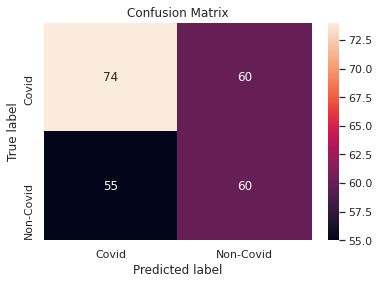

Test Accuracy: 0.5382
Precision: 0.5375
Recall: 0.5382
F1 Score: 0.5376
Cohen Kappa Score: 0.07375060650169807
Matthews Corrcoef: 0.07381048411102778
ROC AUC: 0.5368217054263565
		Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.57      0.56       129
           1       0.52      0.50      0.51       120

    accuracy                           0.54       249
   macro avg       0.54      0.54      0.54       249
weighted avg       0.54      0.54      0.54       249



In [33]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Random Forest Classifier**

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training Accuracy : 1.0
Validation Accuracy : 0.683


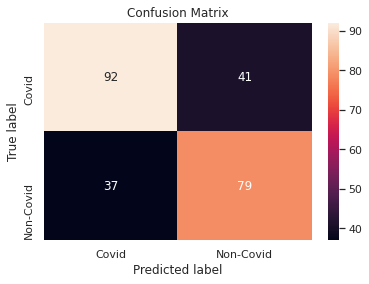

Test Accuracy: 0.6867
Precision: 0.6866
Recall: 0.6867
F1 Score: 0.6865
Cohen Kappa Score: 0.3719441210710128
Matthews Corrcoef: 0.37213719031657044
ROC AUC: 0.6857558139534883
		Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       129
           1       0.68      0.66      0.67       120

    accuracy                           0.69       249
   macro avg       0.69      0.69      0.69       249
weighted avg       0.69      0.69      0.69       249



In [35]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**XG-Boost Classfier**

In [36]:
from xgboost import XGBClassifier
model = XGBClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy : 0.7854
Validation Accuracy : 0.6875


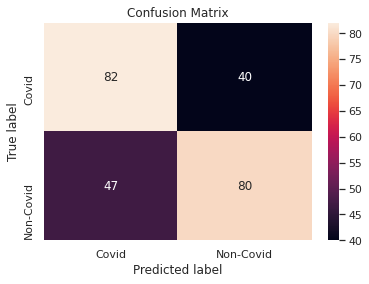

Test Accuracy: 0.6506
Precision: 0.6518
Recall: 0.6506
F1 Score: 0.6507
Cohen Kappa Score: 0.3017116333043227
Matthews Corrcoef: 0.302188963521308
ROC AUC: 0.6511627906976745
		Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.65       129
           1       0.63      0.67      0.65       120

    accuracy                           0.65       249
   macro avg       0.65      0.65      0.65       249
weighted avg       0.65      0.65      0.65       249



In [37]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**AdaBoost Classifier**

In [38]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Training Accuracy : 0.7221
Validation Accuracy : 0.6741


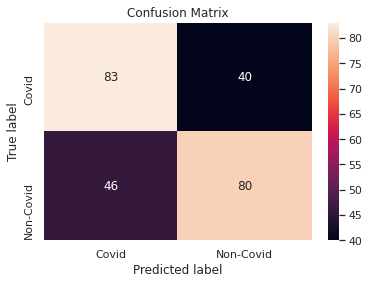

Test Accuracy: 0.6546
Precision: 0.6556
Recall: 0.6546
F1 Score: 0.6547
Cohen Kappa Score: 0.3095376281679242
Matthews Corrcoef: 0.30989739881897077
ROC AUC: 0.6550387596899225
		Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.66       129
           1       0.63      0.67      0.65       120

    accuracy                           0.65       249
   macro avg       0.65      0.66      0.65       249
weighted avg       0.66      0.65      0.65       249



In [39]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)
print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **Feature Extraction using ResNet50**

In [41]:
from keras.applications.resnet50 import ResNet50
baseModel = ResNet50(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='tanh')(x)
predictions = Dense(8, activation='tanh')(x)
model_feat = Model(inputs=base_model.input,outputs=predictions)

94773248/94765736 [==============================] - 1s 0us/step


**K-NN Classifier**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski' , p=2)
model.fit(feat_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Training Accuracy : 0.7465
Validation Accuracy : 0.6116


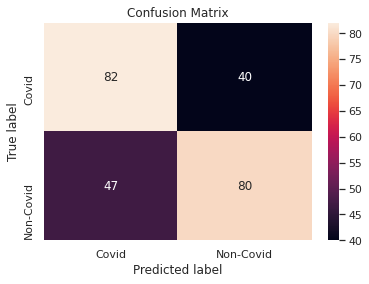

Test Accuracy: 0.6506
Precision: 0.6518
Recall: 0.6506
F1 Score: 0.6507
Cohen Kappa Score: 0.3017116333043227
Matthews Corrcoef: 0.302188963521308
ROC AUC: 0.6511627906976745
		Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.65       129
           1       0.63      0.67      0.65       120

    accuracy                           0.65       249
   macro avg       0.65      0.65      0.65       249
weighted avg       0.65      0.65      0.65       249



In [43]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**ANN Classifier**

In [44]:
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = Sequential()
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['accuracy'])
model.fit(feat_train , y_train)

63/63 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5747


Training Accuracy : 0.5852
Validation Accuracy : 0.6696


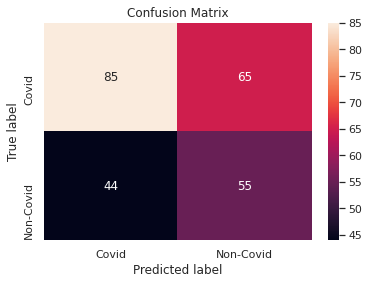

Test Accuracy: 0.5622
Precision: 0.5613
Recall: 0.5622
F1 Score: 0.5577
Cohen Kappa Score: 0.11796821682753245
Matthews Corrcoef: 0.11970930912332511
ROC AUC: 0.5586240310077519
		Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.66      0.61       129
           1       0.56      0.46      0.50       120

    accuracy                           0.56       249
   macro avg       0.56      0.56      0.56       249
weighted avg       0.56      0.56      0.56       249



In [45]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Decision Tree Classifier**

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training Accuracy : 1.0
Validation Accuracy : 0.5357


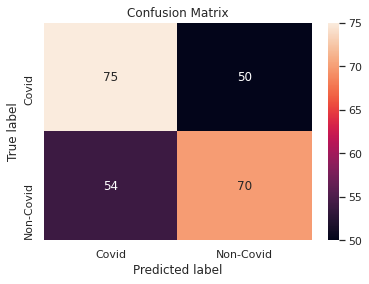

Test Accuracy: 0.5823
Precision: 0.5829
Recall: 0.5823
F1 Score: 0.5825
Cohen Kappa Score: 0.16453735965931082
Matthews Corrcoef: 0.16462237129650034
ROC AUC: 0.5823643410852714
		Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59       129
           1       0.56      0.58      0.57       120

    accuracy                           0.58       249
   macro avg       0.58      0.58      0.58       249
weighted avg       0.58      0.58      0.58       249



In [47]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**SVM Classifier**

In [48]:
from sklearn.svm import SVC
model = SVC( kernel = 'sigmoid',random_state = 0)

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training Accuracy : 0.5468
Validation Accuracy : 0.5312


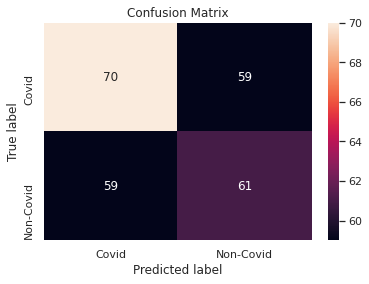

Test Accuracy: 0.5261
Precision: 0.5261
Recall: 0.5261
F1 Score: 0.5261
Cohen Kappa Score: 0.05096899224806195
Matthews Corrcoef: 0.05096899224806201
ROC AUC: 0.525484496124031
		Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54       129
           1       0.51      0.51      0.51       120

    accuracy                           0.53       249
   macro avg       0.53      0.53      0.53       249
weighted avg       0.53      0.53      0.53       249



In [49]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Random Forest Classifier**

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training Accuracy : 1.0
Validation Accuracy : 0.6429


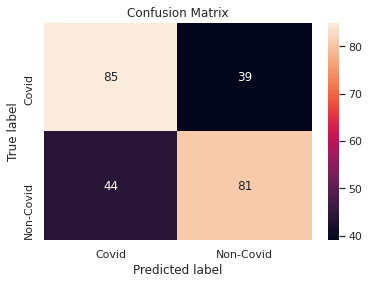

Test Accuracy: 0.6667
Precision: 0.6674
Recall: 0.6667
F1 Score: 0.6668
Cohen Kappa Score: 0.333430091920658
Matthews Corrcoef: 0.333699230286906
ROC AUC: 0.6669573643410853
		Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.67       129
           1       0.65      0.68      0.66       120

    accuracy                           0.67       249
   macro avg       0.67      0.67      0.67       249
weighted avg       0.67      0.67      0.67       249



In [51]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**XG-Boost Classifier**

In [52]:
from xgboost import XGBClassifier
model = XGBClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy : 0.7515
Validation Accuracy : 0.6518


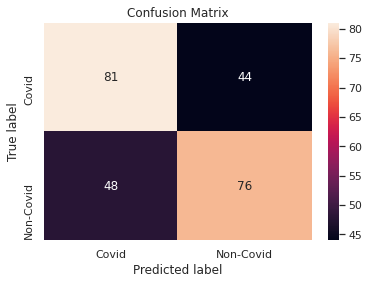

Test Accuracy: 0.6305
Precision: 0.6311
Recall: 0.6305
F1 Score: 0.6306
Cohen Kappa Score: 0.2609368950832365
Matthews Corrcoef: 0.26107171353845
ROC AUC: 0.6306201550387598
		Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64       129
           1       0.61      0.63      0.62       120

    accuracy                           0.63       249
   macro avg       0.63      0.63      0.63       249
weighted avg       0.63      0.63      0.63       249



In [53]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**AdaBoost Classifier**

In [54]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Training Accuracy : 0.6882
Validation Accuracy : 0.6384


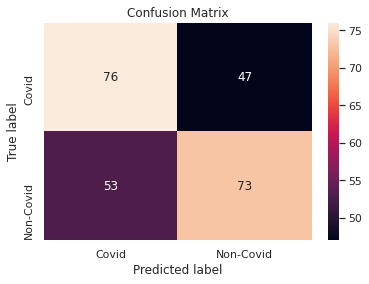

Test Accuracy: 0.5984
Precision: 0.5993
Recall: 0.5984
F1 Score: 0.5985
Cohen Kappa Score: 0.19713677693944665
Matthews Corrcoef: 0.19736590587283198
ROC AUC: 0.5987403100775193
		Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.59      0.60       129
           1       0.58      0.61      0.59       120

    accuracy                           0.60       249
   macro avg       0.60      0.60      0.60       249
weighted avg       0.60      0.60      0.60       249



In [55]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)
print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **Feature Extraction using ResNet152**

In [56]:
from keras.applications.resnet import ResNet152
baseModel = ResNet152(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='tanh')(x)
predictions = Dense(8, activation='tanh')(x)
model_feat = Model(inputs=base_model.input,outputs=predictions)

234700800/234698864 [==============================] - 2s 0us/step


**K-NN Classifier**

In [57]:
from sklearn.neighbors import KNeighborsClassifier
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski' , p=2)
model.fit(feat_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Training Accuracy : 0.7605
Validation Accuracy : 0.6384


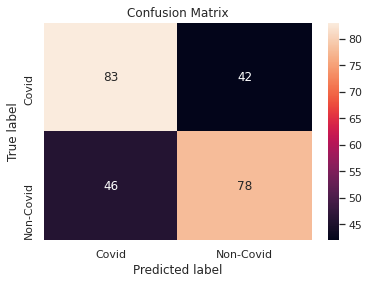

Test Accuracy: 0.6466
Precision: 0.6471
Recall: 0.6466
F1 Score: 0.6467
Cohen Kappa Score: 0.2930700735578784
Matthews Corrcoef: 0.2932214942857665
ROC AUC: 0.6467054263565892
		Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       129
           1       0.63      0.65      0.64       120

    accuracy                           0.65       249
   macro avg       0.65      0.65      0.65       249
weighted avg       0.65      0.65      0.65       249



In [58]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**ANN Classifier**

In [59]:
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = Sequential()
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['accuracy'])
model.fit(feat_train , y_train)

63/63 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5632


Training Accuracy : 0.5757
Validation Accuracy : 0.5759


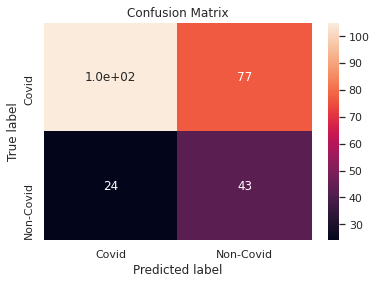

Test Accuracy: 0.5944
Precision: 0.6082
Recall: 0.5944
F1 Score: 0.5715
Cohen Kappa Score: 0.17498277728570022
Matthews Corrcoef: 0.19411738945712298
ROC AUC: 0.5861434108527132
		Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.81      0.68       129
           1       0.64      0.36      0.46       120

    accuracy                           0.59       249
   macro avg       0.61      0.59      0.57       249
weighted avg       0.61      0.59      0.57       249



In [60]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Decision Tree Classifier**

In [61]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training Accuracy : 1.0
Validation Accuracy : 0.6384


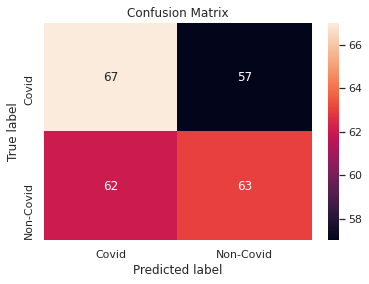

Test Accuracy: 0.5221
Precision: 0.5228
Recall: 0.5221
F1 Score: 0.5222
Cohen Kappa Score: 0.04431543299467833
Matthews Corrcoef: 0.04435120356105715
ROC AUC: 0.5221899224806201
		Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.52      0.53       129
           1       0.50      0.53      0.51       120

    accuracy                           0.52       249
   macro avg       0.52      0.52      0.52       249
weighted avg       0.52      0.52      0.52       249



In [62]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**SVM Classifier**

In [63]:
from sklearn.svm import SVC
model = SVC( kernel = 'sigmoid',random_state = 0)

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training Accuracy : 0.4826
Validation Accuracy : 0.4286


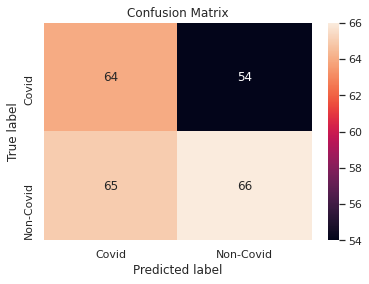

Test Accuracy: 0.5221
Precision: 0.5238
Recall: 0.5221
F1 Score: 0.5219
Cohen Kappa Score: 0.04597701149425282
Matthews Corrcoef: 0.04615684145850674
ROC AUC: 0.523062015503876
		Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52       129
           1       0.50      0.55      0.53       120

    accuracy                           0.52       249
   macro avg       0.52      0.52      0.52       249
weighted avg       0.52      0.52      0.52       249



In [64]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Random Forest Classifier**

In [65]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training Accuracy : 1.0
Validation Accuracy : 0.7054


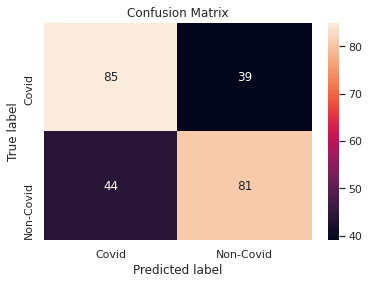

Test Accuracy: 0.6667
Precision: 0.6674
Recall: 0.6667
F1 Score: 0.6668
Cohen Kappa Score: 0.333430091920658
Matthews Corrcoef: 0.333699230286906
ROC AUC: 0.6669573643410853
		Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.67       129
           1       0.65      0.68      0.66       120

    accuracy                           0.67       249
   macro avg       0.67      0.67      0.67       249
weighted avg       0.67      0.67      0.67       249



In [66]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**XG-Boost Classifier**

In [67]:
from xgboost import XGBClassifier
model = XGBClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy : 0.7789
Validation Accuracy : 0.6607


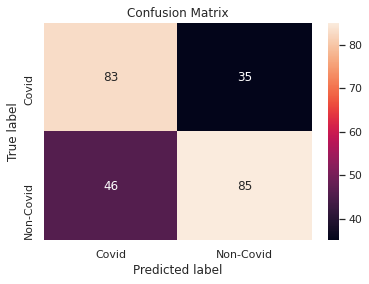

Test Accuracy: 0.6747
Precision: 0.6771
Recall: 0.6747
F1 Score: 0.6746
Cohen Kappa Score: 0.35062300782381917
Matthews Corrcoef: 0.35199440019827616
ROC AUC: 0.6758720930232559
		Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.64      0.67       129
           1       0.65      0.71      0.68       120

    accuracy                           0.67       249
   macro avg       0.68      0.68      0.67       249
weighted avg       0.68      0.67      0.67       249



In [68]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**AdaBoost Classifier**

In [69]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Training Accuracy : 0.6932
Validation Accuracy : 0.6161


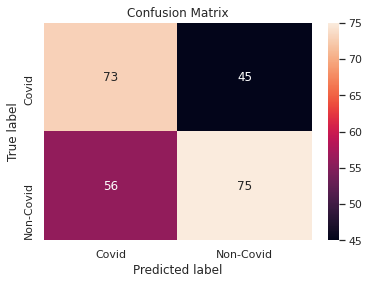

Test Accuracy: 0.5944
Precision: 0.5964
Recall: 0.5944
F1 Score: 0.5942
Cohen Kappa Score: 0.1902830097556264
Matthews Corrcoef: 0.19102726401945017
ROC AUC: 0.5954457364341085
		Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.57      0.59       129
           1       0.57      0.62      0.60       120

    accuracy                           0.59       249
   macro avg       0.60      0.60      0.59       249
weighted avg       0.60      0.59      0.59       249



In [70]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)
print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **Feature Extraction using MobileNetV2**

In [86]:
from keras.applications.mobilenet_v2 import MobileNetV2
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='tanh')(x)
predictions = Dense(8, activation='tanh')(x)
model_feat = Model(inputs=base_model.input,outputs=predictions)

9412608/9406464 [==============================] - 0s 0us/step


**K-NN Classifier**

In [87]:
from sklearn.neighbors import KNeighborsClassifier
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski' , p=2)
model.fit(feat_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Training Accuracy : 0.742
Validation Accuracy : 0.6295


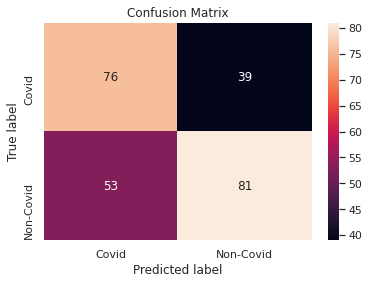

Test Accuracy: 0.6305
Precision: 0.6337
Recall: 0.6305
F1 Score: 0.6301
Cohen Kappa Score: 0.2630766261339511
Matthews Corrcoef: 0.2647465522192918
ROC AUC: 0.6320736434108527
		Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.59      0.62       129
           1       0.60      0.68      0.64       120

    accuracy                           0.63       249
   macro avg       0.63      0.63      0.63       249
weighted avg       0.63      0.63      0.63       249



In [88]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**ANN Classifier**

In [89]:
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = Sequential()
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['accuracy'])
model.fit(feat_train , y_train)

63/63 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.4821


Training Accuracy : 0.506
Validation Accuracy : 0.4777


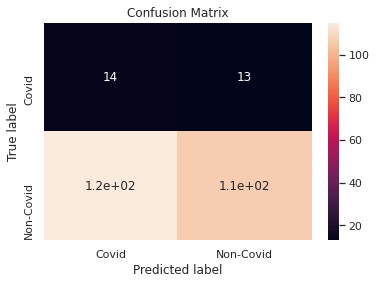

Test Accuracy: 0.4859
Precision: 0.5009
Recall: 0.4859
F1 Score: 0.3945
Cohen Kappa Score: 0.000188217579522032
Matthews Corrcoef: 0.0003114421632136997
ROC AUC: 0.5000968992248063
		Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.11      0.18       129
           1       0.48      0.89      0.63       120

    accuracy                           0.49       249
   macro avg       0.50      0.50      0.40       249
weighted avg       0.50      0.49      0.39       249



In [90]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Decision Tree Classifier**

In [91]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training Accuracy : 1.0
Validation Accuracy : 0.6071


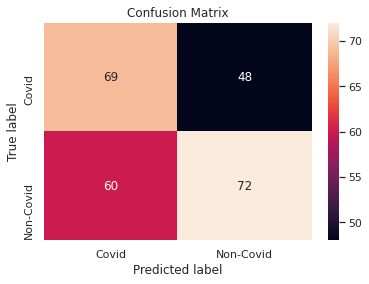

Test Accuracy: 0.5663
Precision: 0.5684
Recall: 0.5663
F1 Score: 0.566
Cohen Kappa Score: 0.1344148319814601
Matthews Corrcoef: 0.1350408365582542
ROC AUC: 0.5674418604651164
		Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.53      0.56       129
           1       0.55      0.60      0.57       120

    accuracy                           0.57       249
   macro avg       0.57      0.57      0.57       249
weighted avg       0.57      0.57      0.57       249



In [92]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**SVM Classifier**

In [93]:
from sklearn.svm import SVC
model = SVC( kernel = 'sigmoid',random_state = 0)

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training Accuracy : 0.5299
Validation Accuracy : 0.5268


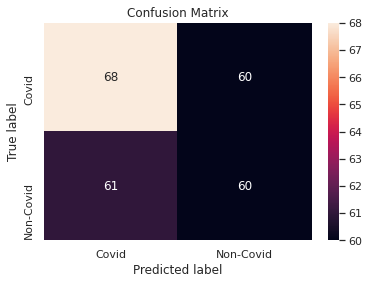

Test Accuracy: 0.5141
Precision: 0.5142
Recall: 0.5141
F1 Score: 0.5141
Cohen Kappa Score: 0.027123898091640064
Matthews Corrcoef: 0.027124774865302924
ROC AUC: 0.5135658914728682
		Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53       129
           1       0.50      0.50      0.50       120

    accuracy                           0.51       249
   macro avg       0.51      0.51      0.51       249
weighted avg       0.51      0.51      0.51       249



In [94]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Random Forest Classifier**

In [95]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training Accuracy : 1.0
Validation Accuracy : 0.6964


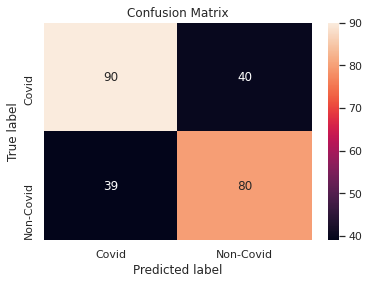

Test Accuracy: 0.6827
Precision: 0.6827
Recall: 0.6827
F1 Score: 0.6827
Cohen Kappa Score: 0.3644470291751478
Matthews Corrcoef: 0.3644588235472208
ROC AUC: 0.6821705426356588
		Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.69       129
           1       0.67      0.67      0.67       120

    accuracy                           0.68       249
   macro avg       0.68      0.68      0.68       249
weighted avg       0.68      0.68      0.68       249



In [96]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**XG-Boost Classifier**

In [97]:
from xgboost import XGBClassifier
model = XGBClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy : 0.7724
Validation Accuracy : 0.692


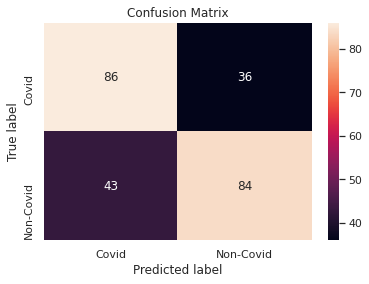

Test Accuracy: 0.6827
Precision: 0.684
Recall: 0.6827
F1 Score: 0.6828
Cohen Kappa Score: 0.3659220578280631
Matthews Corrcoef: 0.36650097370661194
ROC AUC: 0.6833333333333335
		Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.67      0.69       129
           1       0.66      0.70      0.68       120

    accuracy                           0.68       249
   macro avg       0.68      0.68      0.68       249
weighted avg       0.68      0.68      0.68       249



In [98]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**AdaBoost Classifier**

In [99]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Training Accuracy : 0.7067
Validation Accuracy : 0.6741


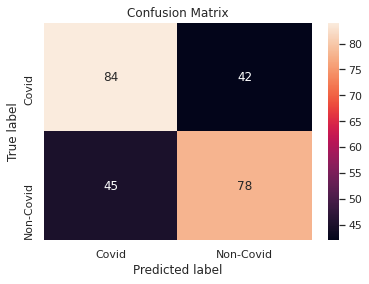

Test Accuracy: 0.6506
Precision: 0.651
Recall: 0.6506
F1 Score: 0.6507
Cohen Kappa Score: 0.30090037757769394
Matthews Corrcoef: 0.3009878486029253
ROC AUC: 0.6505813953488372
		Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66       129
           1       0.63      0.65      0.64       120

    accuracy                           0.65       249
   macro avg       0.65      0.65      0.65       249
weighted avg       0.65      0.65      0.65       249



In [100]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)
print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **Feature Extraction Using MobileNet**

In [101]:
from keras.applications.mobilenet import MobileNet 
baseModel = MobileNet(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='tanh')(x)
predictions = Dense(8, activation='tanh')(x)
model_feat = Model(inputs=base_model.input,outputs=predictions)

17227776/17225924 [==============================] - 0s 0us/step


**K-NN Classifier**

In [102]:
from sklearn.neighbors import KNeighborsClassifier
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski' , p=2)
model.fit(feat_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Training Accuracy : 0.7256
Validation Accuracy : 0.6339


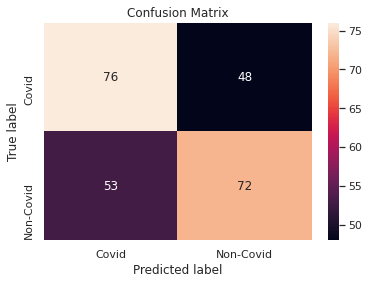

Test Accuracy: 0.5944
Precision: 0.5951
Recall: 0.5944
F1 Score: 0.5945
Cohen Kappa Score: 0.18887276245766815
Matthews Corrcoef: 0.18902521692398158
ROC AUC: 0.5945736434108527
		Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.59      0.60       129
           1       0.58      0.60      0.59       120

    accuracy                           0.59       249
   macro avg       0.59      0.59      0.59       249
weighted avg       0.60      0.59      0.59       249



In [103]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**ANN Classifier**

In [104]:
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = Sequential()
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['accuracy'])
model.fit(feat_train , y_train)

63/63 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.5020


Training Accuracy : 0.506
Validation Accuracy : 0.5134


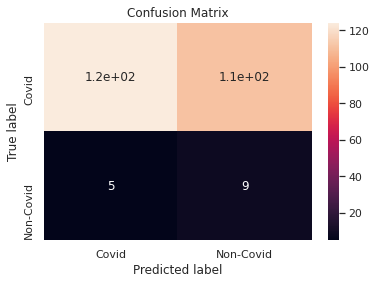

Test Accuracy: 0.5341
Precision: 0.5832
Recall: 0.5341
F1 Score: 0.4177
Cohen Kappa Score: 0.03739252149570094
Matthews Corrcoef: 0.07861029645833288
ROC AUC: 0.5181201550387597
		Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.96      0.68       129
           1       0.64      0.07      0.13       120

    accuracy                           0.53       249
   macro avg       0.59      0.52      0.41       249
weighted avg       0.58      0.53      0.42       249



In [105]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Decision Tree Classifier**

In [106]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training Accuracy : 1.0
Validation Accuracy : 0.5491


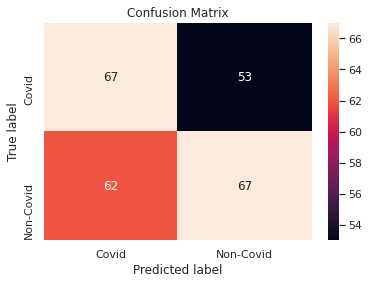

Test Accuracy: 0.5382
Precision: 0.5396
Recall: 0.5382
F1 Score: 0.5382
Cohen Kappa Score: 0.07751038948487476
Matthews Corrcoef: 0.07771317829457364
ROC AUC: 0.5388565891472868
		Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.52      0.54       129
           1       0.52      0.56      0.54       120

    accuracy                           0.54       249
   macro avg       0.54      0.54      0.54       249
weighted avg       0.54      0.54      0.54       249



In [107]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**SVM Classifier**

In [108]:
from sklearn.svm import SVC
model = SVC( kernel = 'sigmoid',random_state = 0)

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training Accuracy : 0.4641
Validation Accuracy : 0.4509


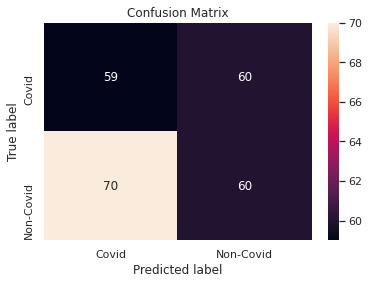

Test Accuracy: 0.4779
Precision: 0.4793
Recall: 0.4779
F1 Score: 0.4778
Cohen Kappa Score: -0.04251207729468587
Matthews Corrcoef: -0.04264943679807903
ROC AUC: 0.47868217054263573
		Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.46      0.48       129
           1       0.46      0.50      0.48       120

    accuracy                           0.48       249
   macro avg       0.48      0.48      0.48       249
weighted avg       0.48      0.48      0.48       249



In [109]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Random Forest Classifier**

In [110]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training Accuracy : 1.0
Validation Accuracy : 0.6562


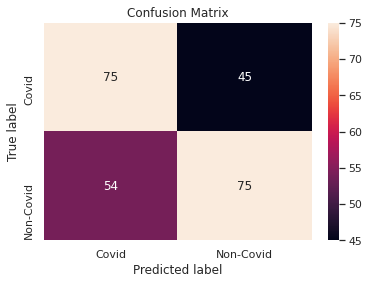

Test Accuracy: 0.6024
Precision: 0.604
Recall: 0.6024
F1 Score: 0.6024
Cohen Kappa Score: 0.2058567700782835
Matthews Corrcoef: 0.2063953488372093
ROC AUC: 0.6031976744186046
		Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.58      0.60       129
           1       0.58      0.62      0.60       120

    accuracy                           0.60       249
   macro avg       0.60      0.60      0.60       249
weighted avg       0.60      0.60      0.60       249



In [111]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**XGBoost Classifier**

In [112]:
from xgboost import XGBClassifier
model = XGBClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy : 0.754
Validation Accuracy : 0.6339


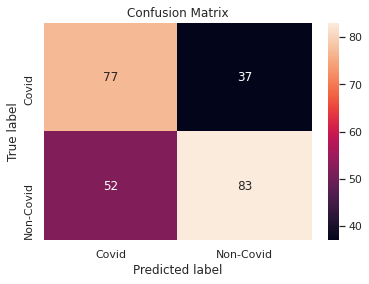

Test Accuracy: 0.6426
Precision: 0.6462
Recall: 0.6426
F1 Score: 0.6421
Cohen Kappa Score: 0.2873130728412928
Matthews Corrcoef: 0.289408421416118
ROC AUC: 0.6442829457364341
		Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.60      0.63       129
           1       0.61      0.69      0.65       120

    accuracy                           0.64       249
   macro avg       0.65      0.64      0.64       249
weighted avg       0.65      0.64      0.64       249



In [113]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**AdaBoost Classifier**

In [114]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Training Accuracy : 0.6599
Validation Accuracy : 0.6295


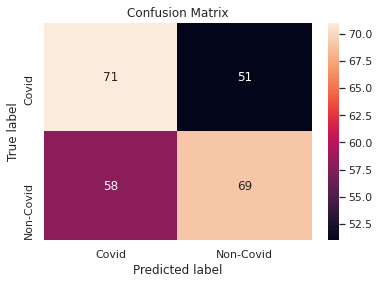

Test Accuracy: 0.5622
Precision: 0.5633
Recall: 0.5622
F1 Score: 0.5623
Cohen Kappa Score: 0.12513296586403644
Matthews Corrcoef: 0.12533093551172195
ROC AUC: 0.5626937984496123
		Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.55      0.57       129
           1       0.54      0.57      0.56       120

    accuracy                           0.56       249
   macro avg       0.56      0.56      0.56       249
weighted avg       0.56      0.56      0.56       249



In [115]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)
print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **Feature Extraction Using InceptionV3**

In [116]:
from keras.applications.inception_v3 import InceptionV3
baseModel = InceptionV3(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='tanh')(x)
predictions = Dense(8, activation='tanh')(x)
model_feat = Model(inputs=base_model.input,outputs=predictions)

87916544/87910968 [==============================] - 1s 0us/step


**K-NN Classifier**

In [117]:
from sklearn.neighbors import KNeighborsClassifier
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski' , p=2)
model.fit(feat_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Training Accuracy : 0.7415
Validation Accuracy : 0.625


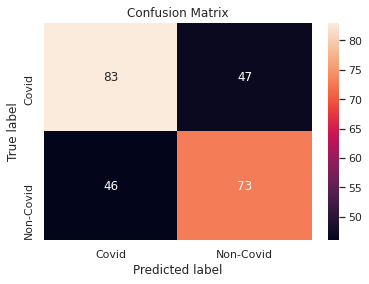

Test Accuracy: 0.6265
Precision: 0.6264
Recall: 0.6265
F1 Score: 0.6264
Cohen Kappa Score: 0.25181738877580684
Matthews Corrcoef: 0.2518255381850212
ROC AUC: 0.6258720930232559
		Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64       129
           1       0.61      0.61      0.61       120

    accuracy                           0.63       249
   macro avg       0.63      0.63      0.63       249
weighted avg       0.63      0.63      0.63       249



In [118]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

 **ANN Classifier**

In [119]:
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = Sequential()
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['accuracy'])
model.fit(feat_train , y_train)

63/63 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5408


Training Accuracy : 0.5553
Validation Accuracy : 0.5357


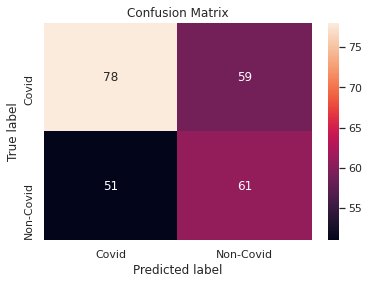

Test Accuracy: 0.5582
Precision: 0.5574
Recall: 0.5582
F1 Score: 0.5573
Cohen Kappa Score: 0.11324786324786318
Matthews Corrcoef: 0.11348410486447279
ROC AUC: 0.5564922480620155
		Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.60      0.59       129
           1       0.54      0.51      0.53       120

    accuracy                           0.56       249
   macro avg       0.56      0.56      0.56       249
weighted avg       0.56      0.56      0.56       249



In [120]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Decision Tree Classifier**

In [121]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training Accuracy : 1.0
Validation Accuracy : 0.6339


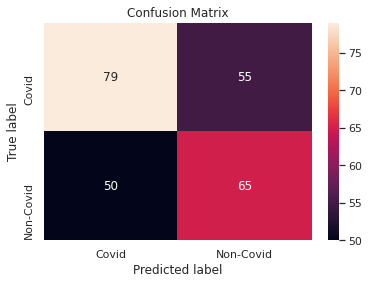

Test Accuracy: 0.5783
Precision: 0.5778
Recall: 0.5783
F1 Score: 0.5778
Cohen Kappa Score: 0.15429403202328962
Matthews Corrcoef: 0.15441930228491338
ROC AUC: 0.5770348837209301
		Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60       129
           1       0.57      0.54      0.55       120

    accuracy                           0.58       249
   macro avg       0.58      0.58      0.58       249
weighted avg       0.58      0.58      0.58       249



In [122]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**SVM Classifier**

In [123]:
from sklearn.svm import SVC
model = SVC( kernel = 'sigmoid',random_state = 0)

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training Accuracy : 0.4985
Validation Accuracy : 0.5268


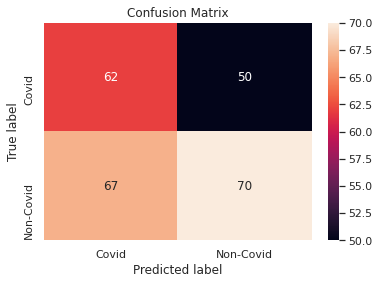

Test Accuracy: 0.5301
Precision: 0.533
Recall: 0.5301
F1 Score: 0.5291
Cohen Kappa Score: 0.06363899334683254
Matthews Corrcoef: 0.06423628577234308
ROC AUC: 0.5319767441860466
		Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.48      0.51       129
           1       0.51      0.58      0.54       120

    accuracy                           0.53       249
   macro avg       0.53      0.53      0.53       249
weighted avg       0.53      0.53      0.53       249



In [124]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Random Forest Classifier**

In [125]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training Accuracy : 1.0
Validation Accuracy : 0.683


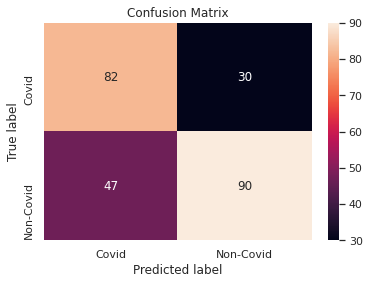

Test Accuracy: 0.6908
Precision: 0.6959
Recall: 0.6908
F1 Score: 0.6901
Cohen Kappa Score: 0.3837624144248385
Matthews Corrcoef: 0.38736426874837193
ROC AUC: 0.6928294573643411
		Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68       129
           1       0.66      0.75      0.70       120

    accuracy                           0.69       249
   macro avg       0.69      0.69      0.69       249
weighted avg       0.70      0.69      0.69       249



In [126]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**XG Boost Classifier**

In [127]:
from xgboost import XGBClassifier
model = XGBClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy : 0.7794
Validation Accuracy : 0.7054


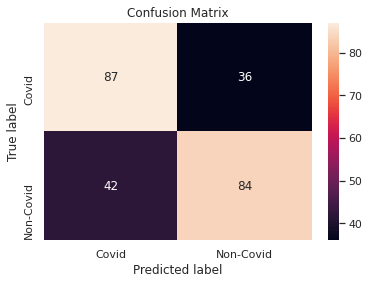

Test Accuracy: 0.6867
Precision: 0.6877
Recall: 0.6867
F1 Score: 0.6868
Cohen Kappa Score: 0.3737666860127684
Matthews Corrcoef: 0.3742011090739072
ROC AUC: 0.6872093023255814
		Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69       129
           1       0.67      0.70      0.68       120

    accuracy                           0.69       249
   macro avg       0.69      0.69      0.69       249
weighted avg       0.69      0.69      0.69       249



In [128]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**AdaBoost Classifier**

In [129]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Training Accuracy : 0.6902
Validation Accuracy : 0.6339


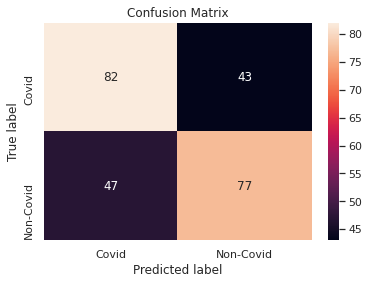

Test Accuracy: 0.6386
Precision: 0.6391
Recall: 0.6386
F1 Score: 0.6387
Cohen Kappa Score: 0.27700348432055744
Matthews Corrcoef: 0.27714660391210827
ROC AUC: 0.6386627906976744
		Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       129
           1       0.62      0.64      0.63       120

    accuracy                           0.64       249
   macro avg       0.64      0.64      0.64       249
weighted avg       0.64      0.64      0.64       249



In [130]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)
print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **Feature Extraction Using InceptionResNetV2**

In [131]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
baseModel = InceptionResNetV2(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='tanh')(x)
predictions = Dense(8, activation='tanh')(x)
model_feat = Model(inputs=base_model.input,outputs=predictions)

219062272/219055592 [==============================] - 1s 0us/step


**K-NN Classifier**

In [132]:
from sklearn.neighbors import KNeighborsClassifier
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski' , p=2)
model.fit(feat_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Training Accuracy : 0.7724
Validation Accuracy : 0.6518


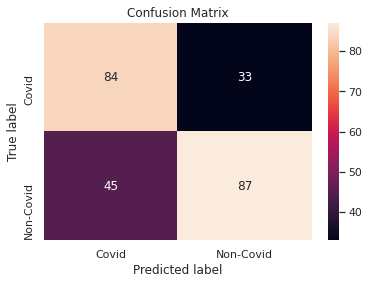

Test Accuracy: 0.6867
Precision: 0.6896
Recall: 0.6867
F1 Score: 0.6866
Cohen Kappa Score: 0.3748551564310545
Matthews Corrcoef: 0.37660095367754504
ROC AUC: 0.6880813953488373
		Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68       129
           1       0.66      0.72      0.69       120

    accuracy                           0.69       249
   macro avg       0.69      0.69      0.69       249
weighted avg       0.69      0.69      0.69       249



In [133]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**ANN Classifier**

In [134]:
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = Sequential()
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['accuracy'])
model.fit(feat_train , y_train)

63/63 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5807


Training Accuracy : 0.5931
Validation Accuracy : 0.625


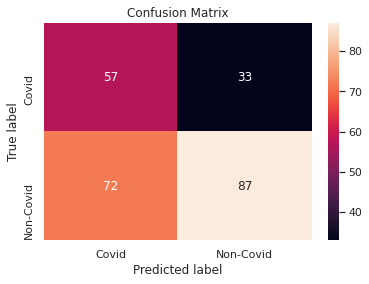

Test Accuracy: 0.5783
Precision: 0.5918
Recall: 0.5783
F1 Score: 0.5702
Cohen Kappa Score: 0.16498993963782693
Matthews Corrcoef: 0.17354779938660167
ROC AUC: 0.5834302325581395
		Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.44      0.52       129
           1       0.55      0.72      0.62       120

    accuracy                           0.58       249
   macro avg       0.59      0.58      0.57       249
weighted avg       0.59      0.58      0.57       249



In [135]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Decision Tree Classifier**

In [136]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training Accuracy : 1.0
Validation Accuracy : 0.5938


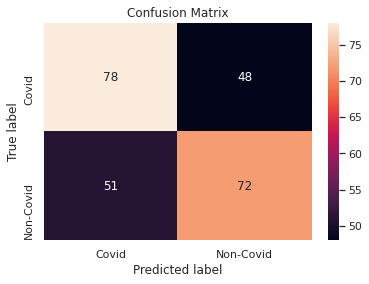

Test Accuracy: 0.6024
Precision: 0.6028
Recall: 0.6024
F1 Score: 0.6025
Cohen Kappa Score: 0.20447284345047922
Matthews Corrcoef: 0.2045322832205207
ROC AUC: 0.6023255813953489
		Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61       129
           1       0.59      0.60      0.59       120

    accuracy                           0.60       249
   macro avg       0.60      0.60      0.60       249
weighted avg       0.60      0.60      0.60       249



In [138]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**SVM Classifier**

In [141]:
from sklearn.svm import SVC
model = SVC( kernel = 'sigmoid',random_state = 0)

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training Accuracy : 0.5558
Validation Accuracy : 0.5268


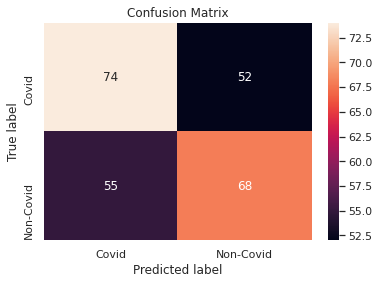

Test Accuracy: 0.5703
Precision: 0.5707
Recall: 0.5703
F1 Score: 0.5704
Cohen Kappa Score: 0.14018782069900282
Matthews Corrcoef: 0.14022857296558427
ROC AUC: 0.5701550387596899
		Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.57      0.58       129
           1       0.55      0.57      0.56       120

    accuracy                           0.57       249
   macro avg       0.57      0.57      0.57       249
weighted avg       0.57      0.57      0.57       249



In [142]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Random Forest Classifier**

In [143]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training Accuracy : 1.0
Validation Accuracy : 0.7232


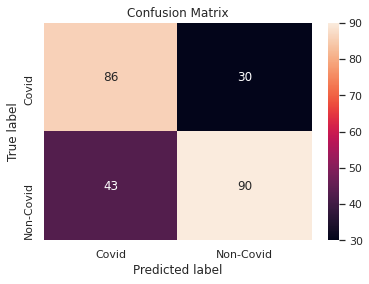

Test Accuracy: 0.7068
Precision: 0.7102
Recall: 0.7068
F1 Score: 0.7066
Cohen Kappa Score: 0.4150979824307366
Matthews Corrcoef: 0.4173682624833732
ROC AUC: 0.7083333333333334
		Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       129
           1       0.68      0.75      0.71       120

    accuracy                           0.71       249
   macro avg       0.71      0.71      0.71       249
weighted avg       0.71      0.71      0.71       249



In [144]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**XG Boost Classifier**

In [145]:
from xgboost import XGBClassifier
model = XGBClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy : 0.7764
Validation Accuracy : 0.683


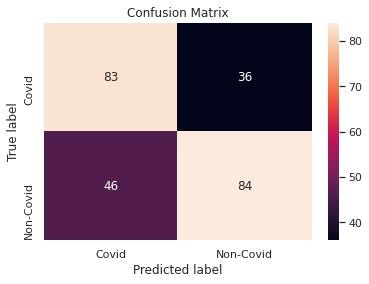

Test Accuracy: 0.6707
Precision: 0.6727
Recall: 0.6707
F1 Score: 0.6706
Cohen Kappa Score: 0.34241545893719805
Matthews Corrcoef: 0.3435218273008911
ROC AUC: 0.6717054263565891
		Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.64      0.67       129
           1       0.65      0.70      0.67       120

    accuracy                           0.67       249
   macro avg       0.67      0.67      0.67       249
weighted avg       0.67      0.67      0.67       249



In [146]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**AdaBoost Classifier**

In [147]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Training Accuracy : 0.7037
Validation Accuracy : 0.6607


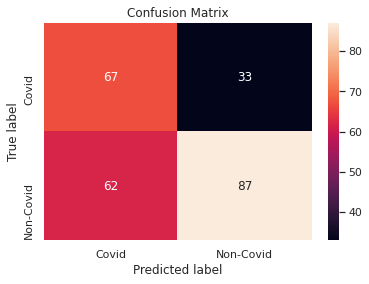

Test Accuracy: 0.6185
Precision: 0.6285
Recall: 0.6185
F1 Score: 0.6149
Cohen Kappa Score: 0.24233688863265113
Matthews Corrcoef: 0.24909082377549055
ROC AUC: 0.6221899224806202
		Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.52      0.59       129
           1       0.58      0.72      0.65       120

    accuracy                           0.62       249
   macro avg       0.63      0.62      0.62       249
weighted avg       0.63      0.62      0.61       249



In [148]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)
print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **Feature Extraction Using DenseNet169**

In [149]:
from keras.applications.densenet import DenseNet169
base_model = DenseNet169(include_top=False, weights='imagenet', input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='tanh')(x)
predictions = Dense(8, activation='tanh')(x)
model_feat = Model(inputs=base_model.input,outputs=predictions)

51879936/51877672 [==============================] - 1s 0us/step


**K-NN Classifier**

In [150]:
from sklearn.neighbors import KNeighborsClassifier
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski' , p=2)
model.fit(feat_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Training Accuracy : 0.7684
Validation Accuracy : 0.6339


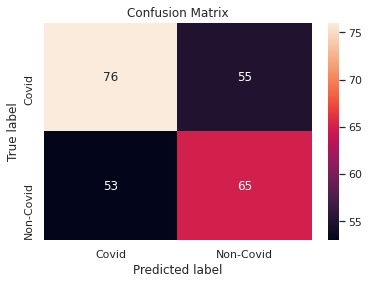

Test Accuracy: 0.5663
Precision: 0.566
Recall: 0.5663
F1 Score: 0.5661
Cohen Kappa Score: 0.13089005235602102
Matthews Corrcoef: 0.13090700833820187
ROC AUC: 0.5654069767441859
		Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.59      0.58       129
           1       0.55      0.54      0.55       120

    accuracy                           0.57       249
   macro avg       0.57      0.57      0.57       249
weighted avg       0.57      0.57      0.57       249



In [151]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**ANN Classifier**

In [152]:
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = Sequential()
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['accuracy'])
model.fit(feat_train , y_train)

63/63 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5025


Training Accuracy : 0.5085
Validation Accuracy : 0.4554


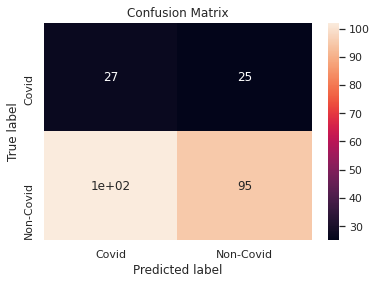

Test Accuracy: 0.49
Precision: 0.5014
Recall: 0.49
F1 Score: 0.4434
Cohen Kappa Score: 0.0009477774618519286
Matthews Corrcoef: 0.0011911624545217598
ROC AUC: 0.500484496124031
		Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.21      0.30       129
           1       0.48      0.79      0.60       120

    accuracy                           0.49       249
   macro avg       0.50      0.50      0.45       249
weighted avg       0.50      0.49      0.44       249



In [153]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Decision Tree Classifier**

In [154]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training Accuracy : 1.0
Validation Accuracy : 0.6518


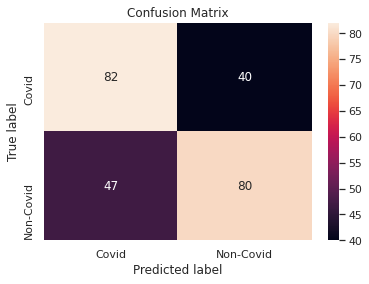

Test Accuracy: 0.6506
Precision: 0.6518
Recall: 0.6506
F1 Score: 0.6507
Cohen Kappa Score: 0.3017116333043227
Matthews Corrcoef: 0.302188963521308
ROC AUC: 0.6511627906976745
		Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.65       129
           1       0.63      0.67      0.65       120

    accuracy                           0.65       249
   macro avg       0.65      0.65      0.65       249
weighted avg       0.65      0.65      0.65       249



In [155]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**SVM Classiier**

In [156]:
from sklearn.svm import SVC
model = SVC( kernel = 'sigmoid',random_state = 0)

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training Accuracy : 0.4935
Validation Accuracy : 0.5223


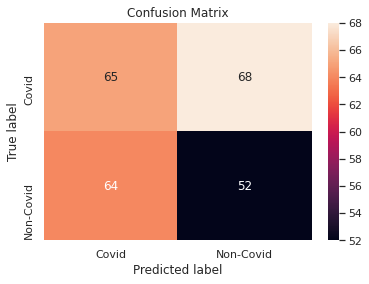

Test Accuracy: 0.4699
Precision: 0.4692
Recall: 0.4699
F1 Score: 0.4694
Cohen Kappa Score: -0.0628637951105937
Matthews Corrcoef: -0.0628964265323781
ROC AUC: 0.4686046511627907
		Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.50      0.50       129
           1       0.45      0.43      0.44       120

    accuracy                           0.47       249
   macro avg       0.47      0.47      0.47       249
weighted avg       0.47      0.47      0.47       249



In [157]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Random Forest Classifier**

In [158]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training Accuracy : 1.0
Validation Accuracy : 0.7946


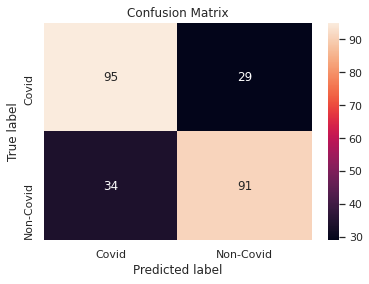

Test Accuracy: 0.747
Precision: 0.7478
Recall: 0.747
F1 Score: 0.7471
Cohen Kappa Score: 0.4940493468795356
Matthews Corrcoef: 0.4944481340234887
ROC AUC: 0.7473837209302325
		Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       129
           1       0.73      0.76      0.74       120

    accuracy                           0.75       249
   macro avg       0.75      0.75      0.75       249
weighted avg       0.75      0.75      0.75       249



In [159]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**XG Boost Classifier**

In [160]:
from xgboost import XGBClassifier
model = XGBClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy : 0.7973
Validation Accuracy : 0.7634


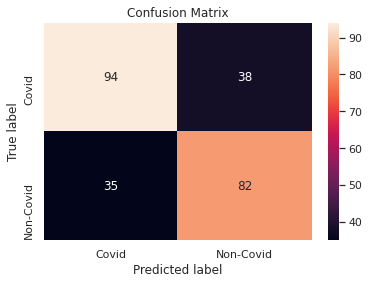

Test Accuracy: 0.7068
Precision: 0.7067
Recall: 0.7068
F1 Score: 0.7067
Cohen Kappa Score: 0.4123751333527301
Matthews Corrcoef: 0.4124954289121385
ROC AUC: 0.7060077519379845
		Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       129
           1       0.70      0.68      0.69       120

    accuracy                           0.71       249
   macro avg       0.71      0.71      0.71       249
weighted avg       0.71      0.71      0.71       249



In [161]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**AdaBoost Classifier**

In [162]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Training Accuracy : 0.7366
Validation Accuracy : 0.6741


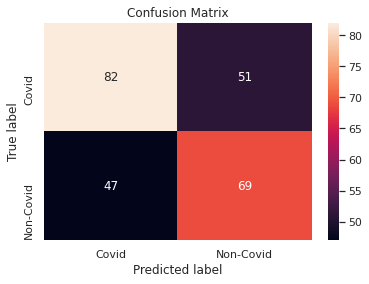

Test Accuracy: 0.6064
Precision: 0.6061
Recall: 0.6064
F1 Score: 0.6061
Cohen Kappa Score: 0.21090415211486224
Matthews Corrcoef: 0.21101362852066358
ROC AUC: 0.6053294573643411
		Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.64      0.63       129
           1       0.59      0.57      0.58       120

    accuracy                           0.61       249
   macro avg       0.61      0.61      0.61       249
weighted avg       0.61      0.61      0.61       249



In [163]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)
print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **Feature Extraction Using DenseNet121**

In [164]:
from keras.applications.densenet import DenseNet121
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='tanh')(x)
predictions = Dense(8, activation='tanh')(x)
model_feat = Model(inputs=base_model.input,outputs=predictions)

29089792/29084464 [==============================] - 1s 0us/step


**K-NN Classifier**

In [165]:
from sklearn.neighbors import KNeighborsClassifier
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski' , p=2)
model.fit(feat_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Training Accuracy : 0.7983
Validation Accuracy : 0.6875


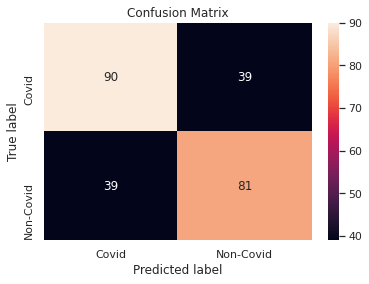

Test Accuracy: 0.6867
Precision: 0.6867
Recall: 0.6867
F1 Score: 0.6867
Cohen Kappa Score: 0.3726744186046511
Matthews Corrcoef: 0.37267441860465117
ROC AUC: 0.6863372093023257
		Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       129
           1       0.68      0.68      0.68       120

    accuracy                           0.69       249
   macro avg       0.69      0.69      0.69       249
weighted avg       0.69      0.69      0.69       249



In [166]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**ANN Classifier**

In [167]:
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = Sequential()
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['accuracy'])
model.fit(feat_train , y_train)

63/63 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5125


Training Accuracy : 0.5593
Validation Accuracy : 0.5357


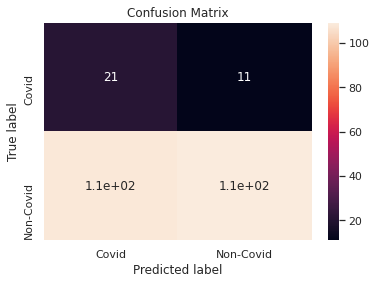

Test Accuracy: 0.5221
Precision: 0.5821
Recall: 0.5221
F1 Score: 0.4469
Cohen Kappa Score: 0.06917349919894455
Matthews Corrcoef: 0.10619326768086323
ROC AUC: 0.5355620155038759
		Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.16      0.26       129
           1       0.50      0.91      0.65       120

    accuracy                           0.52       249
   macro avg       0.58      0.54      0.45       249
weighted avg       0.58      0.52      0.45       249



In [169]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Decision Tree Classifier**

In [170]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training Accuracy : 1.0
Validation Accuracy : 0.7143


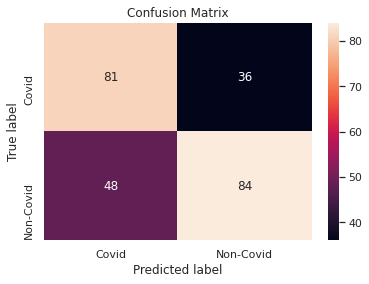

Test Accuracy: 0.6627
Precision: 0.6653
Recall: 0.6627
F1 Score: 0.6625
Cohen Kappa Score: 0.3267670915411356
Matthews Corrcoef: 0.3282889302536869
ROC AUC: 0.663953488372093
		Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66       129
           1       0.64      0.70      0.67       120

    accuracy                           0.66       249
   macro avg       0.66      0.66      0.66       249
weighted avg       0.67      0.66      0.66       249



In [171]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**SVM Classfier**

In [172]:
from sklearn.svm import SVC
model = SVC( kernel = 'sigmoid',random_state = 0)

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training Accuracy : 0.5717
Validation Accuracy : 0.6205


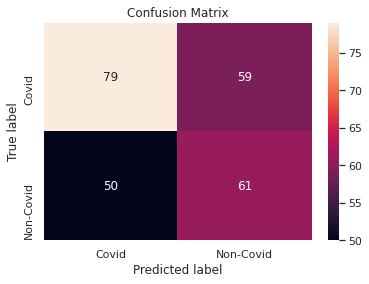

Test Accuracy: 0.5622
Precision: 0.5614
Recall: 0.5622
F1 Score: 0.5611
Cohen Kappa Score: 0.12105314291265912
Matthews Corrcoef: 0.1213731967473973
ROC AUC: 0.5603682170542635
		Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.61      0.59       129
           1       0.55      0.51      0.53       120

    accuracy                           0.56       249
   macro avg       0.56      0.56      0.56       249
weighted avg       0.56      0.56      0.56       249



In [173]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Random Forest Classifier**

In [174]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training Accuracy : 1.0
Validation Accuracy : 0.7946


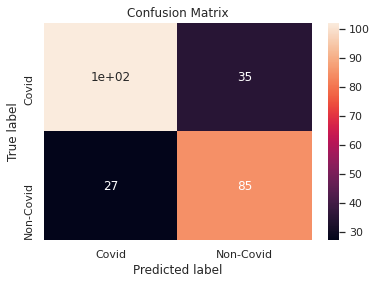

Test Accuracy: 0.751
Precision: 0.7515
Recall: 0.751
F1 Score: 0.7505
Cohen Kappa Score: 0.5001942501942502
Matthews Corrcoef: 0.5012376844357074
ROC AUC: 0.749515503875969
		Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77       129
           1       0.76      0.71      0.73       120

    accuracy                           0.75       249
   macro avg       0.75      0.75      0.75       249
weighted avg       0.75      0.75      0.75       249



In [175]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**XG Boost Classifier**

In [176]:
from xgboost import XGBClassifier
model = XGBClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy : 0.8078
Validation Accuracy : 0.7366


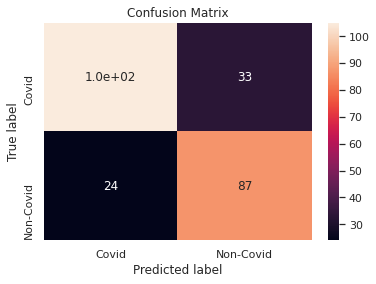

Test Accuracy: 0.7711
Precision: 0.7719
Recall: 0.7711
F1 Score: 0.7705
Cohen Kappa Score: 0.5403672398717575
Matthews Corrcoef: 0.5417959232014637
ROC AUC: 0.7694767441860465
		Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       129
           1       0.78      0.72      0.75       120

    accuracy                           0.77       249
   macro avg       0.77      0.77      0.77       249
weighted avg       0.77      0.77      0.77       249



In [177]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**AdaBoost Classifier**

In [178]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Training Accuracy : 0.7326
Validation Accuracy : 0.6741


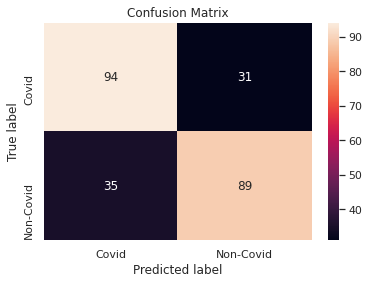

Test Accuracy: 0.7349
Precision: 0.7355
Recall: 0.7349
F1 Score: 0.735
Cohen Kappa Score: 0.46980255516840874
Matthews Corrcoef: 0.47004528839600745
ROC AUC: 0.7351744186046512
		Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       129
           1       0.72      0.74      0.73       120

    accuracy                           0.73       249
   macro avg       0.73      0.74      0.73       249
weighted avg       0.74      0.73      0.74       249



In [179]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)
print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

### **Feature Extraction using Xception**

In [180]:
from keras.applications.xception import Xception
base_model = Xception(include_top=False, weights='imagenet', input_shape=(224,224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='tanh')(x)
predictions = Dense(8, activation='tanh')(x)
model_feat = Model(inputs=base_model.input,outputs=predictions)

83689472/83683744 [==============================] - 0s 0us/step


**K-NN Classifier**

In [181]:
from sklearn.neighbors import KNeighborsClassifier
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski' , p=2)
model.fit(feat_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Training Accuracy : 0.7629
Validation Accuracy : 0.6429


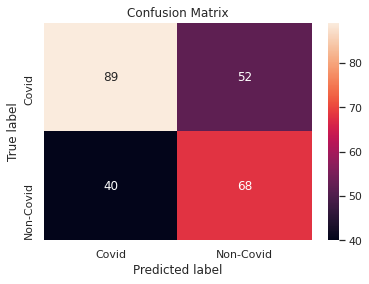

Test Accuracy: 0.6305
Precision: 0.6304
Recall: 0.6305
F1 Score: 0.629
Cohen Kappa Score: 0.25748735900427855
Matthews Corrcoef: 0.25870351385080437
ROC AUC: 0.6282945736434109
		Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66       129
           1       0.63      0.57      0.60       120

    accuracy                           0.63       249
   macro avg       0.63      0.63      0.63       249
weighted avg       0.63      0.63      0.63       249



In [182]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**ANN Classifier**

In [183]:
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model = Sequential()
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(5 , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['accuracy'])
model.fit(feat_train , y_train)

63/63 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5294


Training Accuracy : 0.5493
Validation Accuracy : 0.5268


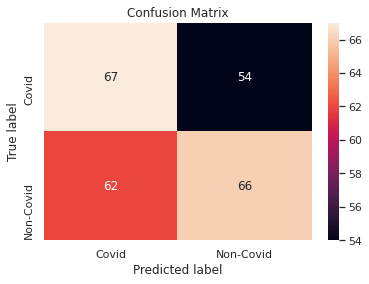

Test Accuracy: 0.5341
Precision: 0.5354
Recall: 0.5341
F1 Score: 0.5342
Cohen Kappa Score: 0.06921887084300082
Matthews Corrcoef: 0.06936192429841748
ROC AUC: 0.5346899224806202
		Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.52      0.54       129
           1       0.52      0.55      0.53       120

    accuracy                           0.53       249
   macro avg       0.53      0.53      0.53       249
weighted avg       0.54      0.53      0.53       249



In [184]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Decision Tree Classifier**

In [185]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Training Accuracy : 1.0
Validation Accuracy : 0.6295


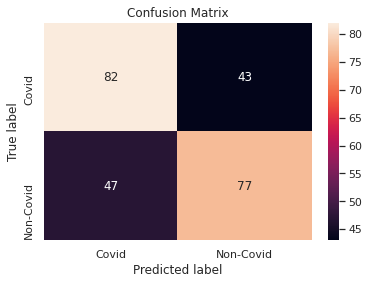

Test Accuracy: 0.6386
Precision: 0.6391
Recall: 0.6386
F1 Score: 0.6387
Cohen Kappa Score: 0.27700348432055744
Matthews Corrcoef: 0.27714660391210827
ROC AUC: 0.6386627906976744
		Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       129
           1       0.62      0.64      0.63       120

    accuracy                           0.64       249
   macro avg       0.64      0.64      0.64       249
weighted avg       0.64      0.64      0.64       249



In [186]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**SVM Classifier**

In [187]:
from sklearn.svm import SVC
model = SVC( kernel = 'sigmoid',random_state = 0)

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Training Accuracy : 0.5299
Validation Accuracy : 0.5536


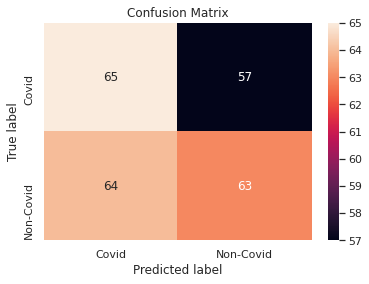

Test Accuracy: 0.5141
Precision: 0.5151
Recall: 0.5141
F1 Score: 0.5142
Cohen Kappa Score: 0.028817329078425824
Matthews Corrcoef: 0.02886292023376595
ROC AUC: 0.514437984496124
		Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.50      0.52       129
           1       0.50      0.53      0.51       120

    accuracy                           0.51       249
   macro avg       0.51      0.51      0.51       249
weighted avg       0.52      0.51      0.51       249



In [188]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**Random Forest Classifier**

In [189]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Training Accuracy : 1.0
Validation Accuracy : 0.692


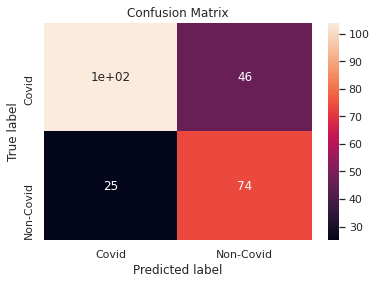

Test Accuracy: 0.7149
Precision: 0.7194
Recall: 0.7149
F1 Score: 0.7119
Cohen Kappa Score: 0.42546553573169543
Matthews Corrcoef: 0.4317449793505709
ROC AUC: 0.7114341085271317
		Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.81      0.75       129
           1       0.75      0.62      0.68       120

    accuracy                           0.71       249
   macro avg       0.72      0.71      0.71       249
weighted avg       0.72      0.71      0.71       249



In [190]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**XG Boost Classifier**

In [191]:
from xgboost import XGBClassifier
model = XGBClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Training Accuracy : 0.7998
Validation Accuracy : 0.6562


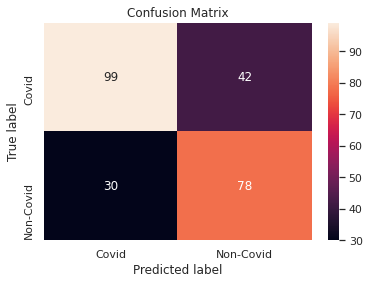

Test Accuracy: 0.7108
Precision: 0.7118
Recall: 0.7108
F1 Score: 0.7097
Cohen Kappa Score: 0.41890315052508753
Matthews Corrcoef: 0.4208816985155836
ROC AUC: 0.7087209302325581
		Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73       129
           1       0.72      0.65      0.68       120

    accuracy                           0.71       249
   macro avg       0.71      0.71      0.71       249
weighted avg       0.71      0.71      0.71       249



In [192]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)

print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)

**AdaBoost Classifier**

In [193]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

feat_train = model_feat.predict(X_train)
feat_test = model_feat.predict(x_test)
feat_val = model_feat.predict(x_val)
model.fit(feat_train , y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Training Accuracy : 0.7186
Validation Accuracy : 0.6607


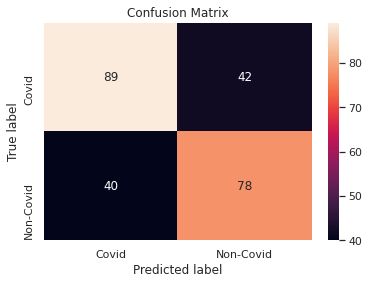

Test Accuracy: 0.6707
Precision: 0.6705
Recall: 0.6707
F1 Score: 0.6706
Cohen Kappa Score: 0.3401202249369789
Matthews Corrcoef: 0.3401642853706757
ROC AUC: 0.6699612403100774
		Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.68       129
           1       0.66      0.65      0.66       120

    accuracy                           0.67       249
   macro avg       0.67      0.67      0.67       249
weighted avg       0.67      0.67      0.67       249



In [194]:
y_pred_train = model.predict(feat_train)
y_pred_test = model.predict(feat_test)
y_pred_val = model.predict(feat_val)
max_y_pred_train = np.round(y_pred_train)
max_y_pred_test = np.round(y_pred_test)
max_y_pred_val = np.round(y_pred_val)
print('Training Accuracy :' , np.round(metrics.accuracy_score(y_train, max_y_pred_train),4))
print('Validation Accuracy :', np.round(metrics.accuracy_score(y_val, max_y_pred_val),4) )
print_confusion_matrix(y_test,max_y_pred_test)
print_performance_metrics(y_test,max_y_pred_test)